In [1]:
# ライブラリのインポート

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import linear_model
import math
from sklearn.linear_model import LinearRegression

print("libraries imported")

libraries imported


(30,)
(30,)


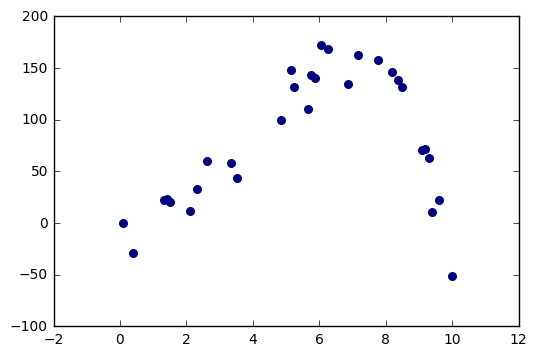

In [2]:
## 扱うデータ (x, y)
x = np.array([  0.1010101 ,   0.4040404 ,   1.31313131,   1.41414141,
         1.51515152,   2.12121212,   2.32323232,   2.62626263,
         3.33333333,   3.53535354,   4.84848485,   5.15151515,
         5.25252525,   5.65656566,   5.75757576,   5.85858586,
         6.06060606,   6.26262626,   6.86868687,   7.17171717,
         7.77777778,   8.18181818,   8.38383838,   8.48484848,
         9.09090909,   9.19191919,   9.29292929,   9.39393939,
         9.5959596 ,  10.])

y = np.array([ -5.46050378e-02,  -2.92475195e+01,   2.22887159e+01,
         2.35136215e+01,   2.08311255e+01,   1.14230325e+01,
         3.28452539e+01,   5.98120422e+01,   5.80298965e+01,
         4.36654304e+01,   1.00118336e+02,   1.47769619e+02,
         1.31545758e+02,   1.10387318e+02,   1.43010464e+02,
         1.40905904e+02,   1.72452366e+02,   1.68266976e+02,
         1.34825938e+02,   1.62271436e+02,   1.57897364e+02,
         1.46482787e+02,   1.38071602e+02,   1.32102141e+02,
         7.04364586e+01,   7.14132111e+01,   6.31395989e+01,
         1.10538096e+01,   2.22409516e+01,  -5.08296958e+01])

print(x.shape)
print(y.shape)
x_plot = np.linspace(0, 10, 100)

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

colors = ['teal', 'yellowgreen', 'gold']
lw = 2
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

plt.show()

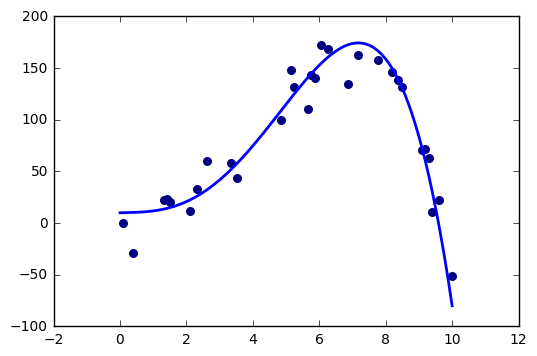

In [3]:
# 自分でフィットする関数を作ってみる
def predict(X):
    return [predict_point(x) for x in X]

# math.sin(x)を使わないでフィットする式を立ててみる
def predict_point(x):
    return 10 + x - x ** 2 + 2 * x**3 - 0.2 * x**4

plt.clf()
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

y_plot = predict(X_plot)
plt.plot(x_plot, y_plot, color='blue', linewidth=lw, label="Handmade Prediction")

plt.show()

/opt/conda/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


[ 39.00257804]


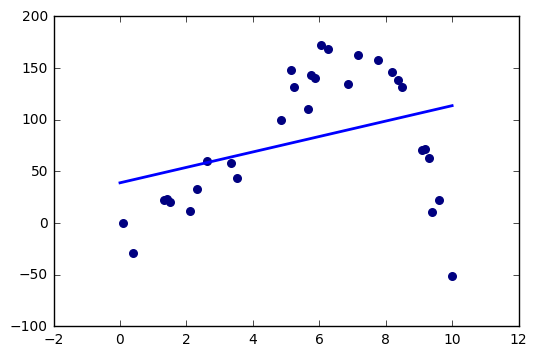

In [4]:
## 1次元の線形回帰
# create matrix versions of these arrays
X = x[:, np.newaxis]

reg = LinearRegression()
reg.fit(X, y)


## 予測
print(reg.predict([0]))

## Plot
plt.clf()
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

y_plot = reg.predict(X_plot)
plt.plot(x_plot, y_plot, color='blue', linewidth=lw, label="Handmade Prediction")

plt.show()

/opt/conda/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


[-72.31454272]


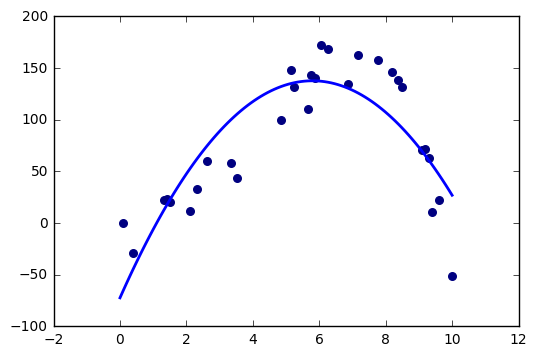

In [5]:
## 2次元の線形回帰
# create matrix versions of these arrays
X = x[:, np.newaxis]

## 高次元の特徴量を追加する。x*xを追加
reg = make_pipeline(PolynomialFeatures(2), LinearRegression())
reg.fit(X, y)

## 予測
print(reg.predict([0]))

## Plot
plt.clf()
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

y_plot = reg.predict(X_plot)
plt.plot(x_plot, y_plot, color='blue', linewidth=lw, label="Handmade Prediction")

plt.show()

score Y=f(x, degree=2)= 0.715055139539


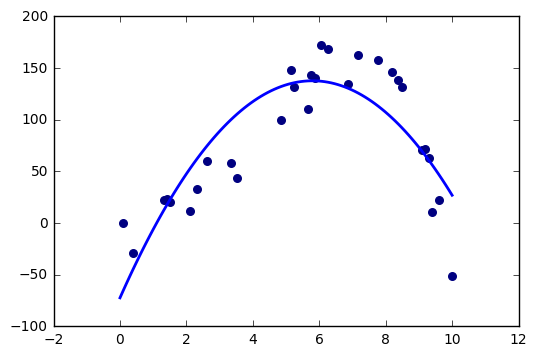

score Y=f(x, degree=3)= 0.923796277587


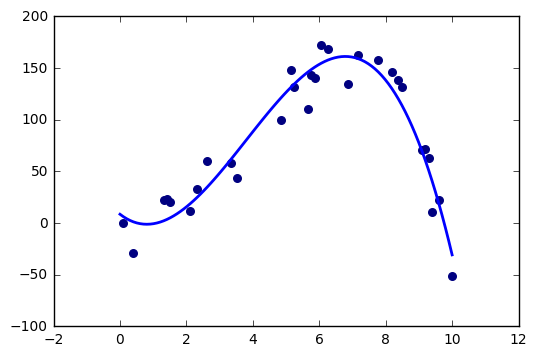

score Y=f(x, degree=4)= 0.946547200841


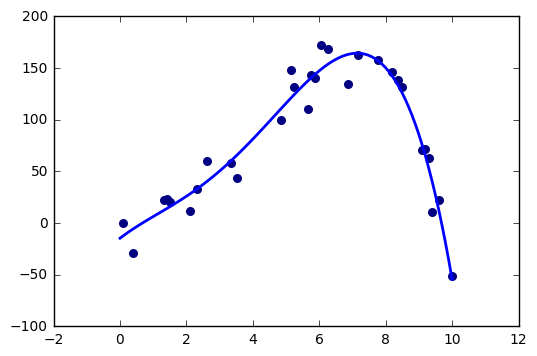

score Y=f(x, degree=5)= 0.946801517615


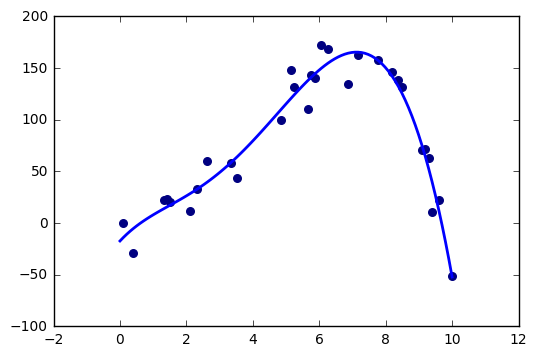

score Y=f(x, degree=6)= 0.946806976451


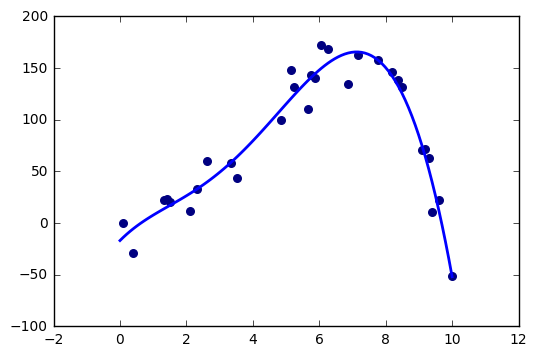

score Y=f(x, degree=7)= 0.947600215053


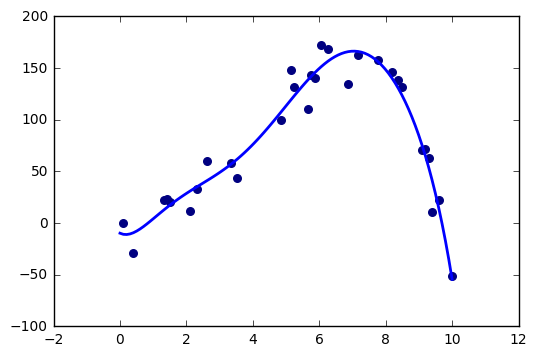

In [6]:
## 1次元の線形回帰
# create matrix versions of these arrays
X = x[:, np.newaxis]

for degree in range(2, 8):
    ## 高次元の特徴量を追加する。
    reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    reg.fit(X, y)
    
    print("score Y=f(x, degree={0})=".format(degree), reg.score(X, y))
    
    ## Plot
    plt.clf()
    plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

    y_plot = reg.predict(X_plot)
    plt.plot(x_plot, y_plot, color='blue', linewidth=lw, label="Handmade Prediction")

    plt.show()